Outlier indices: [6, 10]


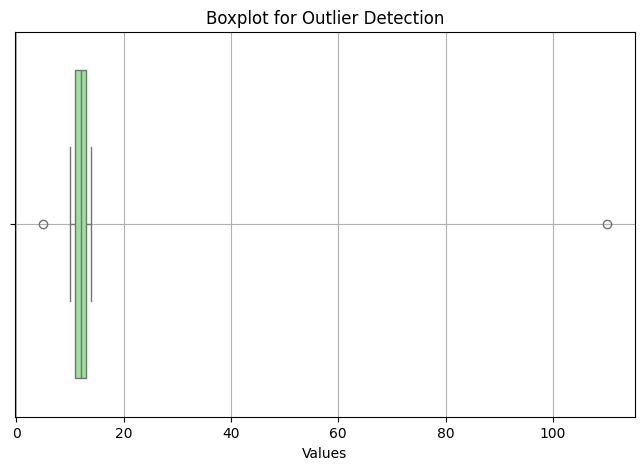

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

def detect_outliers_zscore(data, threshold=3):
    """Detect outliers using Z-score method."""
    z_scores = zscore(data)
    return np.where(np.abs(z_scores) > threshold)[0]

def detect_outliers_iqr(data):
    """Detect outliers using IQR (Interquartile Range) method."""
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where((data < lower_bound) | (data > upper_bound))[0]

def detect_outliers_boxplot(data):
    """Detect outliers using Boxplot method (based on IQR)."""
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where((data < lower_bound) | (data > upper_bound))[0]

def combine_outlier_detection_methods(data):
    """Combine Z-score, IQR, and Boxplot methods to detect outliers."""
    z_outliers = detect_outliers_zscore(data)
    iqr_outliers = detect_outliers_iqr(data)
    boxplot_outliers = detect_outliers_boxplot(data)
    
    # Combine all detected outliers and remove duplicates
    all_outliers = set(z_outliers).union(iqr_outliers).union(boxplot_outliers)
    
    return sorted(list(all_outliers))

# Example dataset
dataset = [10, 12, 13, 11, 12, 14, 110, 12, 13, 11, 5]

# Convert the dataset into a pandas DataFrame for easier visualization
df = pd.DataFrame({'Values': dataset})

# Detect outliers using all methods
outliers = combine_outlier_detection_methods(df['Values'].values)
print("Outlier indices:", outliers)

# Plotting the boxplot for visualization
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Values'], color='lightgreen')
plt.title("Boxplot for Outlier Detection")
plt.xlabel("Values")
plt.grid(True)
plt.show()